# MDS Final Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import category_encoders as ce  # Leave-one-out, CatBoost, Heimert coding
from sklearn.preprocessing import StandardScaler  # label encoder, 標準化
from sklearn.cluster import DBSCAN  # outlier detection
from sklearn.model_selection import train_test_split, GridSearchCV  # split data into train data & test data

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10

<div></div>

<div></div>

<div style="background-color:#D9D9D9;"><font size="20"><b>Data Reading and Analysis</b></font></div>

In [ ]:
#基本不更動raw_data, 之後都用df操作

In [ ]:
raw_data = pd.read_csv('Car_Insurance_Claim.csv').drop(['ID'], axis=1)
display(raw_data.head())
display(raw_data.tail())

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [ ]:
print('The dimension of train dataset: ', raw_data.shape)
raw_data['OUTCOME'].value_counts()

The dimension of train dataset:  (10000, 18)


0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

<font size="5" >🔼 Severe data imbalance!</font>

<div></div>

In [ ]:
raw_data.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [ ]:
percentage_result = raw_data.isnull().sum()/raw_data.shape[0]
percentage_result = pd.DataFrame({"missing": percentage_result}) #"columns": percentage_result.keys(), 
percentage_result.sort_values(by='missing', ascending=False).head()

,missing
CREDIT_SCORE,0.0982
ANNUAL_MILEAGE,0.0957
AGE,0.0000
CHILDREN,0.0000
PAST_ACCIDENTS,0.0000


<font size="3" >🔼<br>
由上可以知道<b>沒有資料缺失</b>，接著處理類別變數<br>
發現眾多欄位包含'Yes'/'No', 將其與其他類別變數分開處理<br></font>

In [ ]:
raw_data.fillna(raw_data.mean(),inplace=True)
percentage_result = raw_data.isnull().sum()/raw_data.shape[0]
percentage_result = pd.DataFrame({"missing": percentage_result}) #"columns": percentage_result.keys(), 
percentage_result.sort_values(by='missing', ascending=False).head()

,missing
AGE,0.0
GENDER,0.0
PAST_ACCIDENTS,0.0
DUIS,0.0
SPEEDING_VIOLATIONS,0.0


<div></div>

<div></div>

<div style="background-color:#D9D9D9;"><font size="20"><b>Preprocessing</b></font></div>

### 處理順序：
先編碼(encode)，再分割訓練測試集(split)，再對「訓練集」標準化(standardize)<br>
[編碼、標準化、分割順序要怎麼選](https://jamesmccaffrey-wordpress-com.translate.goog/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/?_x_tr_sl=auto&_x_tr_tl=zh-CN&_x_tr_hl=zh-CN)

- 類別變數：
    - 其中make為隱藏的車子製造商1~5, model為車子名稱(兩萬多種), 
    - 'area_cluster', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'rear_brakes_type', 'transmission_type', 'steering_type'
- Y/N變數：
    - 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert'

In [ ]:
df = raw_data
# df.replace(['Yes', 'No'], [1,0], inplace=True)
# df['make'].replace([1,2,3,4,5], ['C1','C2','C3','C4','C5'], inplace=True)
display(df)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.000000,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.000000,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.000000,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.000000,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.000000,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.000000,sedan,0,0,1,0.0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,11697.003207,sedan,1,0,0,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.000000,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.000000,sedan,2,0,1,1.0


## 首先把Yes轉為1, No轉為0

## One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

### One hot encoding

In [ ]:
df = pd.get_dummies(df)
df

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,0.629027,1.0,0.0,1.0,10238,12000.000000,0,0,0,0.0,...,0,0,0,0,1,0,1,0,1,0
1,0.357757,0.0,0.0,0.0,10238,16000.000000,0,0,0,1.0,...,1,0,0,1,0,0,0,1,1,0
2,0.493146,1.0,0.0,0.0,10238,11000.000000,0,0,0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,0.206013,1.0,0.0,1.0,32765,11000.000000,0,0,0,0.0,...,0,1,0,0,0,1,0,1,1,0
4,0.388366,1.0,0.0,0.0,32765,12000.000000,2,0,1,1.0,...,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.582787,1.0,0.0,0.0,10238,16000.000000,0,0,1,0.0,...,0,1,0,0,1,0,0,1,1,0
9996,0.522231,1.0,0.0,1.0,32765,11697.003207,1,0,0,0.0,...,1,0,1,0,0,0,1,0,1,0
9997,0.470940,1.0,0.0,1.0,10238,14000.000000,0,0,0,0.0,...,0,0,1,0,0,0,0,1,1,0
9998,0.364185,0.0,0.0,1.0,10238,13000.000000,2,0,1,1.0,...,0,0,0,1,0,0,0,1,1,0


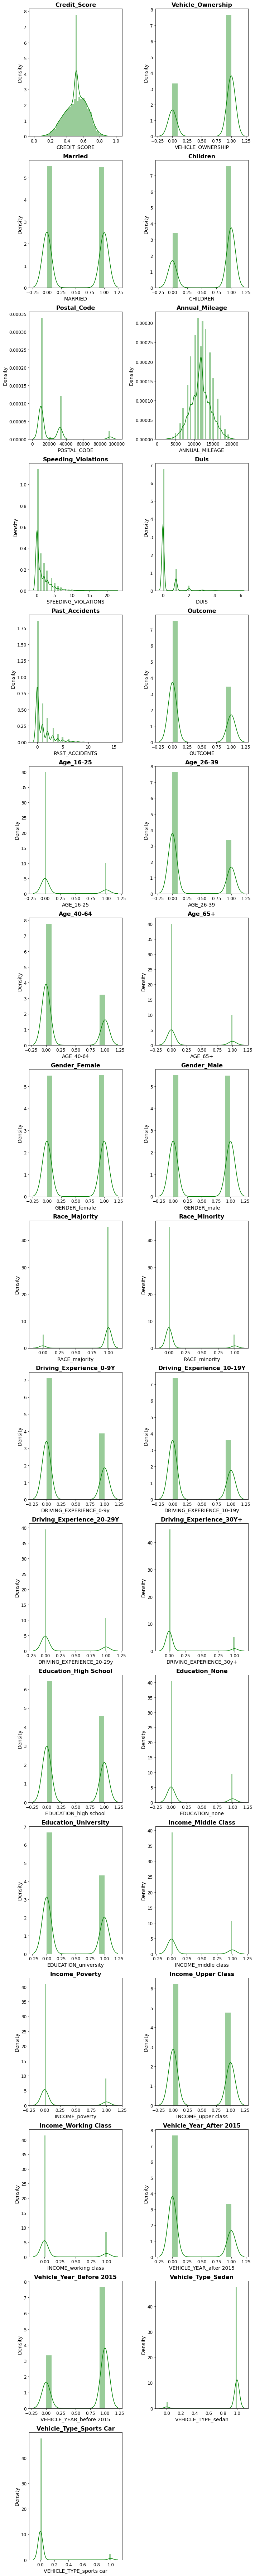

In [ ]:
target = [i for i in df.columns]
plt.figure(figsize=(10,100))

for n,column in enumerate(target):
    plot=plt.subplot(int((len(target)+1) / 2),2,n+1)
    sns.distplot(df[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

<div></div>

### RadViz

是一種多元數據可視化算法，它將每個特徵維度均勻地繪制在圓周上，然後在圓的內部繪制點，使點在從中心到每個弧的軸上的值歸一化。這種機制允許有多少維度就有多少維度，可以很容易地適應一個圓，大大擴展了可視化的維度。
可以使用這種方法來檢測類之間的可分離性。如
- 是否有機會從特徵集中學習
- 檢查是否有太多的噪音

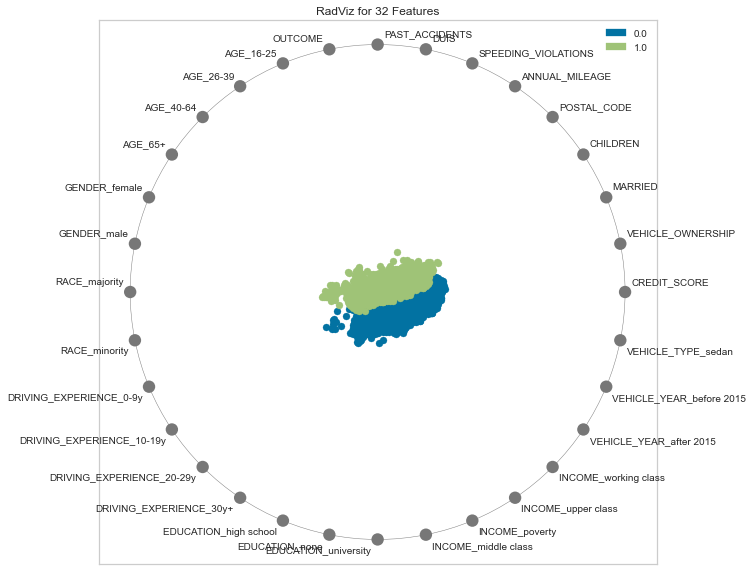

<AxesSubplot: title={'center': 'RadViz for 32 Features'}>

In [ ]:
from yellowbrick.features import RadViz


visualizer = RadViz(classes=df['OUTCOME'].unique(),
                    features=list(df.columns[:-1]), size=(720, 720))
visualizer.fit(df.iloc[:,:-1].values, df['OUTCOME'].values)
visualizer.transform(df[:-1].values)
visualizer.poof()

<font size="3" >🔼上圖看起來標籤的分類沒有很明確，故不期待結果準確區分is_claim，本身是具有偏大難度</font>

<div></div>

## 處理資料不平衡

為了避免受到噪音干擾，同時採用`ENN`(Edited Nearest Neighbor)和`Borderline Smote`進行採樣<br>
- ENN可以改為Tomek Link Removal，Borderline Smote可以改為單純Smote<br>
- 也可以試著採用集成方法Ensemble(BalanceCascade)
- http://www.17bigdata.com/聊聊样本采样技术/ <br><br>
NOTE: 採樣前得先對數據標準化，標準化之前先分好訓練集&測試集

In [ ]:
X = df.drop('OUTCOME',axis=1)
y = df['OUTCOME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<div></div>

### Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns) #先fit
X_test = pd.DataFrame(standard_scaler.transform(X_test), columns=X_test.columns) #再transform
X_train

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_16-25,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,0.231601,0.661480,0.997004,0.677143,-0.511636,-1.380447,1.111686,-0.433018,2.940435,-0.503318,...,-0.485502,-0.811403,-0.523728,-0.469513,1.145486,-0.455173,1.533914,-1.533914,0.221456,-0.221456
1,-1.177864,-1.511761,0.997004,0.677143,-0.511636,-1.006844,-0.661338,-0.433018,-0.642457,-0.503318,...,2.059724,-0.811403,-0.523728,2.129867,-0.872992,-0.455173,-0.651927,0.651927,0.221456,-0.221456
2,0.158058,0.661480,0.997004,-1.476792,-0.511636,0.113963,-0.661338,-0.433018,-0.642457,-0.503318,...,-0.485502,1.232433,1.909388,-0.469513,-0.872992,-0.455173,-0.651927,0.651927,0.221456,-0.221456
3,0.747094,0.661480,0.997004,-1.476792,0.685773,-1.006844,0.668430,-0.433018,-0.642457,-0.503318,...,-0.485502,-0.811403,-0.523728,-0.469513,1.145486,-0.455173,1.533914,-1.533914,0.221456,-0.221456
4,-0.314774,0.661480,-1.003005,-1.476792,0.685773,0.487566,-0.661338,-0.433018,-0.642457,-0.503318,...,-0.485502,1.232433,1.909388,-0.469513,-0.872992,-0.455173,-0.651927,0.651927,0.221456,-0.221456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.367429,0.661480,0.997004,0.677143,-0.511636,0.861168,0.668430,1.346202,1.148989,-0.503318,...,-0.485502,-0.811403,-0.523728,-0.469513,1.145486,-0.455173,-0.651927,0.651927,0.221456,-0.221456
7996,0.051440,0.661480,-1.003005,-1.476792,-0.511636,-0.259639,-0.661338,-0.433018,-0.642457,1.986815,...,-0.485502,1.232433,-0.523728,-0.469513,-0.872992,2.196965,1.533914,-1.533914,0.221456,-0.221456
7997,0.850495,0.661480,0.997004,0.677143,-0.511636,0.000763,-0.661338,-0.433018,0.551840,-0.503318,...,-0.485502,1.232433,-0.523728,-0.469513,1.145486,-0.455173,1.533914,-1.533914,0.221456,-0.221456
7998,1.732647,0.661480,0.997004,0.677143,-0.511636,-1.380447,-0.218082,-0.433018,2.343286,-0.503318,...,-0.485502,1.232433,-0.523728,-0.469513,1.145486,-0.455173,1.533914,-1.533914,0.221456,-0.221456


In [ ]:
from collections import Counter
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn import metrics
def fit_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predicted_y = model.predict(X_test)
    true_y = y_test
    
    print("對於主要目標 標籤為1的預測")
    print(f"Precision：{metrics.precision_score(true_y, predicted_y)}, \
            Recall：{metrics.recall_score(true_y, predicted_y)},\n \
       Accuracy：{metrics.accuracy_score(true_y, predicted_y)}, \
       AUC：{metrics.roc_auc_score(true_y, model.predict_proba(X_test)[:,1])}, \
       f1-score：{metrics.f1_score(true_y, predicted_y)}")
    cm = confusion_matrix(true_y, predicted_y)
    print(cm) 
    print(metrics.classification_report(true_y, predicted_y))
    
    #此處-1是先的label容易搞混，但我們就照平常的方法來不管此例是-1還是1
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(model, X_test, y_test,  cmap=plt.cm.Blues, colorbar=False, ax=ax)
    plt.show()
    
    #已驗算過
    print('The TP rate is: {0:4.2}'.format(float(cm[0][0])/np.sum(cm[0])))
    print('The TN rate is: {0:4.2}'.format(float(cm[1][1])/np.sum(cm[1])))
    print('The FN rate is: {0:4.2}'.format(1- float(cm[0][0])/np.sum(cm[0]))) #FN = 1-TP
    print('The FP rate is: {0:4.2}'.format(1- float(cm[1][1])/np.sum(cm[1]))) #FP = 1-TN

### Baseline performance

對於主要目標 標籤為1的預測
Precision：0.6552287581699346,             Recall：0.6334913112164297,
        Accuracy：0.7785,        AUC：0.7401154035947769,        f1-score：0.6441767068273092
[[1156  211]
 [ 232  401]]
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1367
         1.0       0.66      0.63      0.64       633

    accuracy                           0.78      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.78      0.78      0.78      2000



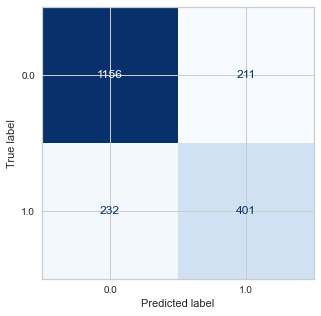

The TP rate is: 0.85
The TN rate is: 0.63
The FN rate is: 0.15
The FP rate is: 0.37


In [ ]:
model = DecisionTreeClassifier(splitter='random')
fit_result(model, X_train, y_train, X_test, y_test)

<div></div>

### CrossCV測試樣本比例

#### *****之後記得把kind_sel的模式改看看，也可以試試一般的ENN*****
https://blog.csdn.net/mathlxj/article/details/89645321
(mode只刪了626筆，另一個能刪除一萬多)

In [ ]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


model = DecisionTreeClassifier(splitter='random')
# print("before data balancing：",Counter(y_train))
# print()

# for i in np.linspace(0.2, 1, 9):
#     for j in range(3, 9, 2):   
#         renn = RepeatedEditedNearestNeighbours()#kind_sel='mode'
#         BDsmote = BorderlineSMOTE(m_neighbors=j, sampling_strategy=i)
#         steps = [('under(renn)', renn), ('over(BDsmote)', BDsmote)]
#         pipeline = Pipeline(steps=steps)
#         X_cv, y_cv = pipeline.fit_resample(X_train, y_train)

#         #重複兩次 5-fold來評分
#         cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
#         scores = cross_val_score(model, X_cv, y_cv, scoring='f1_macro', cv=cv) #n_jobs為一次運行多少processor
#         print(f'ratio={i}, m={j}, Mean f1_macro: %.3f' % np.mean(scores))
#     print("after data balancing:",Counter(y_cv))
#     print()
#     #print("after data balancing:",Counter(y_cv))

<font size="3" >
    🔼<br>
    發現在樣本數為1:1，BorderlineSMOTE m=3的情況下會得到較好的f1_macro值<br>
    <b>注意:</b> 此結果是基於兩 label 的資料分布有改變後的結果，才會有此好的結果在f1_macro
</font>

<div></div>

### 正式將訓練資料重新取樣 -> `X_train_sm`,` y_train_sm`, `X_test_sm`, `y_test`

對於主要目標 標籤為1的預測
Precision：0.608,             Recall：0.8404423380726699,
        Accuracy：0.778,        AUC：0.7947639634767153,        f1-score：0.7055702917771883
[[1024  343]
 [ 101  532]]
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      1367
         1.0       0.61      0.84      0.71       633

    accuracy                           0.78      2000
   macro avg       0.76      0.79      0.76      2000
weighted avg       0.81      0.78      0.79      2000



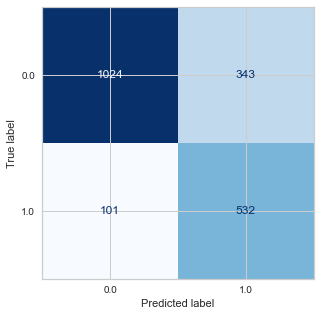

The TP rate is: 0.75
The TN rate is: 0.84
The FN rate is: 0.25
The FP rate is: 0.16


In [ ]:
renn = EditedNearestNeighbours()#kind_sel='mode'
BDsmote = BorderlineSMOTE(m_neighbors=3, sampling_strategy=1.0)
steps = [('under(renn)', renn), ('over(BDsmote)', BDsmote)]
pipeline = Pipeline(steps=steps)
X_train_sm, y_train_sm = pipeline.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(splitter='random')
fit_result(model, X_train_sm, y_train_sm, X_test, y_test)

對於主要目標 標籤為1的預測
Precision：0.596629213483146,             Recall：0.8388625592417062,
        Accuracy：0.7695,        AUC：0.7881218428981025,        f1-score：0.6973079448456992
[[1008  359]
 [ 102  531]]
              precision    recall  f1-score   support

         0.0       0.91      0.74      0.81      1367
         1.0       0.60      0.84      0.70       633

    accuracy                           0.77      2000
   macro avg       0.75      0.79      0.76      2000
weighted avg       0.81      0.77      0.78      2000



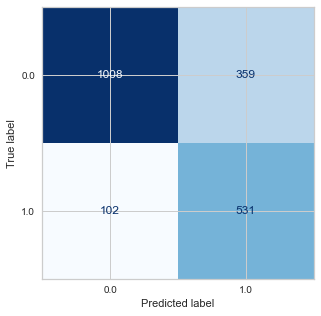

The TP rate is: 0.74
The TN rate is: 0.84
The FN rate is: 0.26
The FP rate is: 0.16


In [ ]:
model = DecisionTreeClassifier(splitter='random')
fit_result(model, X_train_sm, y_train_sm, X_test, y_test)

<div></div>

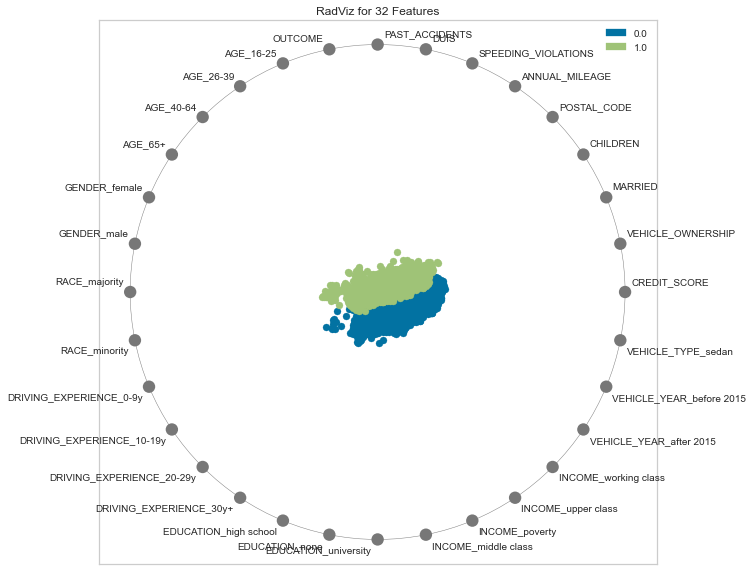

<AxesSubplot: title={'center': 'RadViz for 32 Features'}>

In [ ]:
from yellowbrick.features import RadViz


visualizer = RadViz(classes=df['OUTCOME'].unique(),
                    features=list(df.columns[:-1]), size=(720, 720))
visualizer.fit(df.iloc[:,:-1].values, df['OUTCOME'].values)
visualizer.transform(df[:-1].values)
visualizer.poof()

<div></div>

<div style="background-color:#D9D9D9;"><font size="20"><b>Model Training</b></font></div>

In [ ]:
# conda list scikit

In [ ]:
# conda install -c conda-forge lazypredict 


In [ ]:
# from lazypredict.Supervised import LazyClassifier

# clf = LazyClassifier(predictions=True)
# models, predictions = clf.fit(X_train_final, X_test_final, y_train_final, y_test_final)
# models

In [ ]:
# model = DecisionTreeClassifier(splitter='random')
# fit_result(model, X_train_final, y_train_final, X_test_final, y_test_final)

### 使用CrossCV測試各種模型參數
<font size="3">⚠️⚠️⚠️ 使用時長很大，小心執行。 ⚠️⚠️⚠️</font>

In [ ]:
#crossCV挑參數
#https://blog.csdn.net/weixin_41712499/article/details/82882542
#https://ithelp.ithome.com.tw/articles/10267379?sc=iThomeR
# n_estimators: 森林中樹木的數量，預設=100。
# max_features: 劃分時考慮的最大特徵數，預設auto。
# criterion: 亂度的評估標準，gini/entropy。預設為gini。
# max_depth: 樹的最大深度。
# splitter: 特徵劃分點選擇標準，best/random。預設為best。
# random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
# min_samples_split: 至少有多少資料才能再分
# min_samples_leaf: 分完至少有多少資料才能分
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier(n_estimators=100, random_state= 42)

n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,15, num=8)]
max_depth.append(None)
min_samples_split = [2, 3, 7, 13, 20, 50, 100]
min_samples_leaf = [5, 10, 20, 40, 80]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
random_grid

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 6, 7, 9, 10, 12, 13, 15, None],
 'min_samples_split': [2, 3, 7, 13, 20, 50, 100],
 'min_samples_leaf': [5, 10, 20, 40, 80],
 'bootstrap': [True, False]}

In [ ]:
rdforest = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator = rdforest, 
                               param_distributions=random_grid,
                               n_iter=4, cv=3, verbose=3, 
                               scoring='f1_macro', random_state=42)#, n_jobs=-1

### Before oversampling

#### Random Forest

In [ ]:
# X_train_PCA, y_train, X_test_PCA, y_test

rf_random.fit(X_train, y_train)
param = rf_random.best_params_
param

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100;, score=0.788 total time=   0.4s
[CV 2/3] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100;, score=0.790 total time=   0.3s
[CV 3/3] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100;, score=0.791 total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=20, min_samples_split=7, n_estimators=100;, score=0.790 total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=20, min_samples_split=7, n_estimators=100;, score=0.797 total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=20, min_samples_split=7, n_estimators=100;, score=0.794 total time=   0.3s
[CV 1/3] END 

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

對於主要目標 標籤為1的預測
Precision：0.7547169811320755,             Recall：0.631911532385466,
        Accuracy：0.8185,        AUC：0.8975541741639712,        f1-score：0.6878761822871884
[[1237  130]
 [ 233  400]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1367
         1.0       0.75      0.63      0.69       633

    accuracy                           0.82      2000
   macro avg       0.80      0.77      0.78      2000
weighted avg       0.81      0.82      0.81      2000



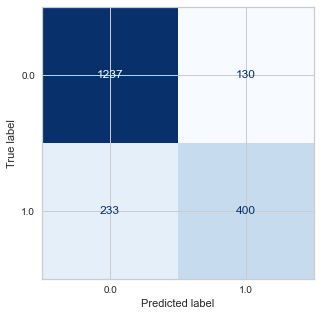

The TP rate is:  0.9
The TN rate is: 0.63
The FN rate is: 0.095
The FP rate is: 0.37


In [ ]:
# param = {'n_estimators': 944,
#  'min_samples_split': 100,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': None,
#  'bootstrap': False}

rdforest_b4sm = RandomForestClassifier(param, random_state=42)
fit_result(model, X_train, y_train, X_test, y_test)

#### Decision Tree

對於主要目標 標籤為1的預測
Precision：0.6495176848874598,             Recall：0.6382306477093207,
        Accuracy：0.7765,        AUC：0.7399166311303103,        f1-score：0.6438247011952192
[[1149  218]
 [ 229  404]]
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      1367
         1.0       0.65      0.64      0.64       633

    accuracy                           0.78      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.78      0.78      0.78      2000



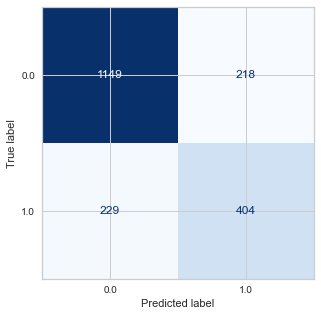

The TP rate is: 0.84
The TN rate is: 0.64
The FN rate is: 0.16
The FP rate is: 0.36


In [ ]:
DTC = DecisionTreeClassifier(splitter='random')
fit_result(DTC, X_train, y_train, X_test, y_test)

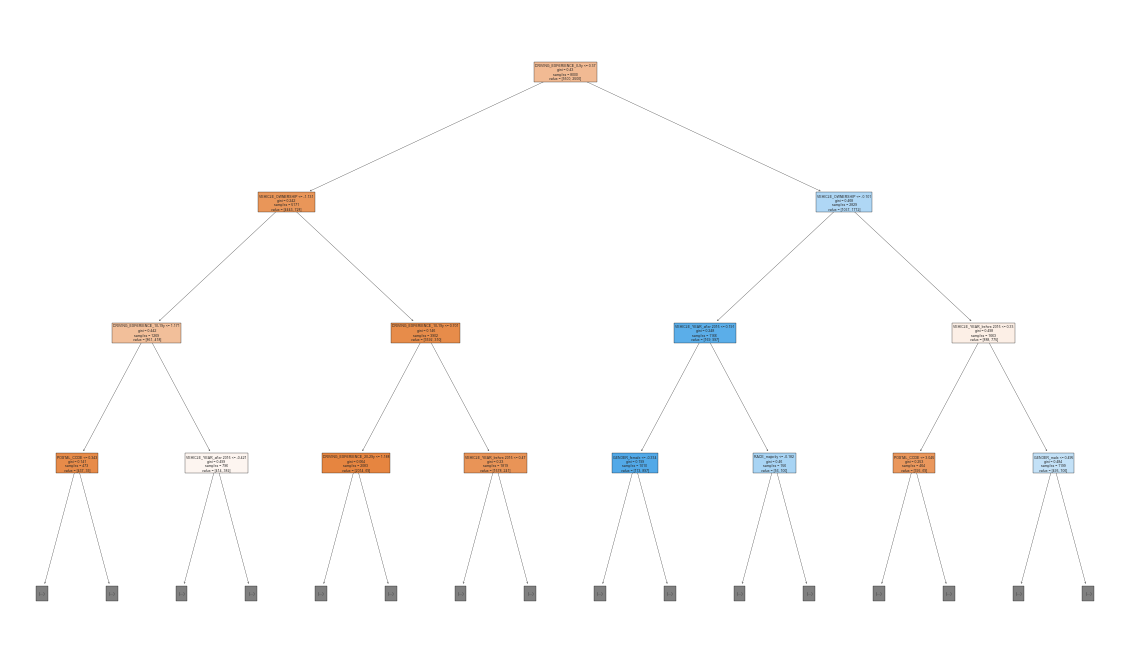

In [ ]:
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
plot_tree(DTC, feature_names=X_train.columns, max_depth=3, filled=True)
plt.show()

<div></div>

### After oversampling

#### Random Forest

In [ ]:
rf_random.fit(X_train_sm, y_train_sm)
param_sm = rf_random.best_params_
param_sm

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100;, score=0.906 total time=   0.3s
[CV 2/3] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100;, score=0.912 total time=   0.3s
[CV 3/3] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100;, score=0.801 total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=20, min_samples_split=7, n_estimators=100;, score=0.902 total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=20, min_samples_split=7, n_estimators=100;, score=0.916 total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=20, min_samples_split=7, n_estimators=100;, score=0.790 total time=   0.4s
[CV 1/3] END 

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

對於主要目標 標籤為1的預測
Precision：0.65311004784689,             Recall：0.8625592417061612,
        Accuracy：0.8115,        AUC：0.8992171600730835,        f1-score：0.7433628318584071
[[1077  290]
 [  87  546]]
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85      1367
         1.0       0.65      0.86      0.74       633

    accuracy                           0.81      2000
   macro avg       0.79      0.83      0.80      2000
weighted avg       0.84      0.81      0.82      2000



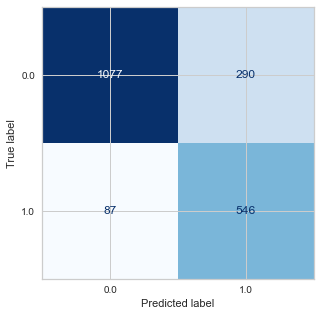

The TP rate is: 0.79
The TN rate is: 0.86
The FN rate is: 0.21
The FP rate is: 0.14


In [ ]:
# param_sm = {'n_estimators': 1366,
#             'min_samples_split': 3,
#             'min_samples_leaf': 40,
#             'max_features': 'auto',
#             'max_depth': 13,
#             'bootstrap': True}

rdforest_sm = RandomForestClassifier(param_sm, random_state=42)
fit_result(model, X_train_sm, y_train_sm, X_test, y_test)

#### Decision Tree

對於主要目標 標籤為1的預測
Precision：0.6174418604651163,             Recall：0.8388625592417062,
        Accuracy：0.7845,        AUC：0.799094776328973,        f1-score：0.7113194909578031
[[1038  329]
 [ 102  531]]
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83      1367
         1.0       0.62      0.84      0.71       633

    accuracy                           0.78      2000
   macro avg       0.76      0.80      0.77      2000
weighted avg       0.82      0.78      0.79      2000



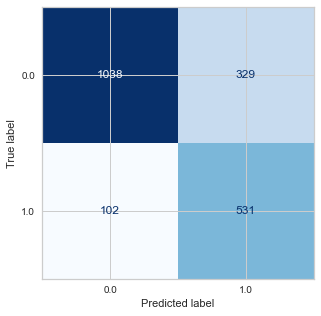

The TP rate is: 0.76
The TN rate is: 0.84
The FN rate is: 0.24
The FP rate is: 0.16


In [ ]:
DTC_sm = DecisionTreeClassifier(splitter='random')
fit_result(DTC_sm, X_train_sm, y_train_sm, X_test, y_test)

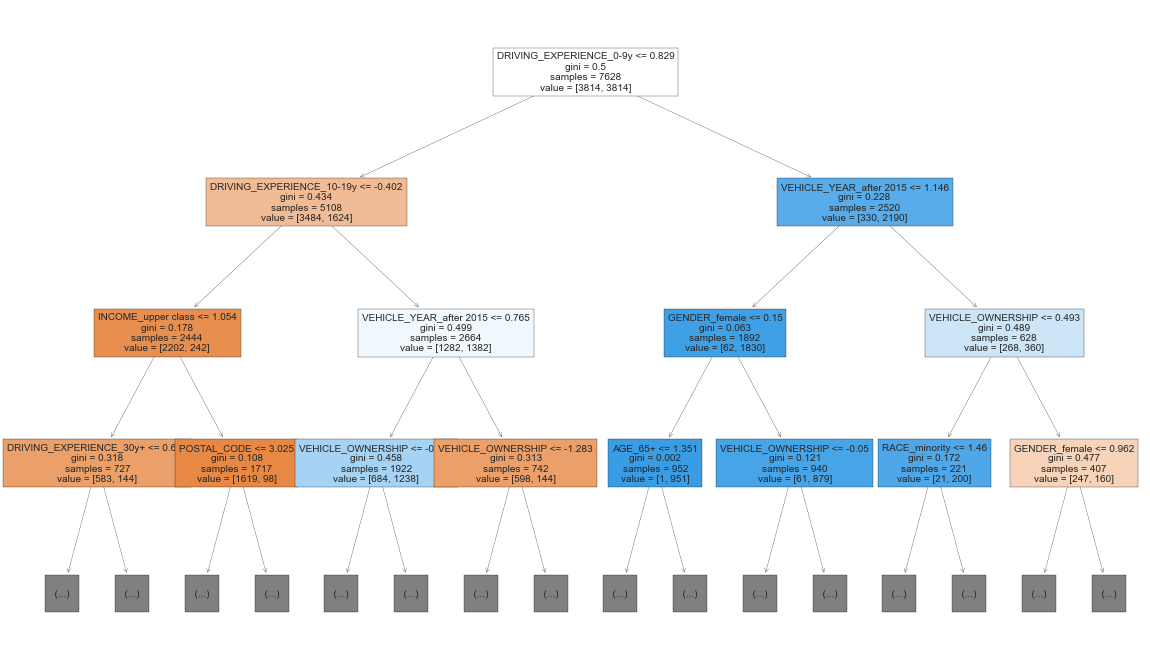

In [ ]:
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
plot_tree(DTC_sm, feature_names=X_train_sm.columns, max_depth=3, filled=True, fontsize=10)
plt.show()